<h1>The Battle of the Neighborhoods</h1>

<h2>Problem</h2>
I want to open an Italian Restaurant in Mexico City, in the Borough of Coyoacan, and I want to know what would be a good location.
Mexico City is one of the most populated areas in the world, and for this reason there are a lot of restaurant of many types.
The first objective is to determine the highest income Borough in Mexico City
The secont objective is to find a Neighborhood that has the lowest density of food related locations in that Borough.

<h2>Information gathered</h2>

I got the neigborhood dataset in csv of Mexico City with coordinates, the only problem is that the latitude and logitude are in the same column separated by comma

I am goint to use the information of the neighborhoods in order so look in Foursquare the restaurant density and see where are less restaurant saturation for Italian Restaurant in each cluster.

In [153]:
# Import modules
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library

import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline 

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from scipy.spatial import distance

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

print('Libraries imported.')

Libraries imported.


In [11]:
# Read CVS
df_colonias = pd.read_csv("2_colonias_cdmx_csv.csv")
df_colonias.head()

,COLONIA,ENTIDAD,Geo Point,Geo Shape,CVE_ALC,ALCALDIA,CVE_COL,SECC_COM,SECC_PAR
0,LOMAS DE CHAPULTEPEC,9.0,"19.4228411174,-99.2157935754","{""type"": ""Polygon"", ""coordinates"": [[[-99.2201...",16,MIGUEL HIDALGO,16-042,"4924, 4931, 4932, 4935, 4936, 4940, 4987","4923, 4937, 4938, 4939, 4942"
1,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),9.0,"19.4106158914,-99.2262487268","{""type"": ""Polygon"", ""coordinates"": [[[-99.2296...",16,MIGUEL HIDALGO,16-044,4963,4964
2,DEL BOSQUE (POLANCO),9.0,"19.4342189235,-99.2094037513","{""type"": ""Polygon"", ""coordinates"": [[[-99.2082...",16,MIGUEL HIDALGO,16-026,NaN,"4918, 4919"
3,PEDREGAL DE SANTA URSULA I,9.0,"19.314862237,-99.1477954505","{""type"": ""Polygon"", ""coordinates"": [[[-99.1458...",3,COYOACAN,03-135,"433, 500, 431, 513, 501","424, 425, 426, 430, 499"
4,AJUSCO I,9.0,"19.324571116,-99.1561602234","{""type"": ""Polygon"", ""coordinates"": [[[-99.1585...",3,COYOACAN,03-128,"376, 377, 378, 379, 404, 493, 498",374


In [12]:
#Dropping unnecessary columns from Colonias
df_colonias.drop(columns=['ENTIDAD','Geo Shape','CVE_ALC','CVE_COL','SECC_COM','SECC_PAR'], inplace=True)
df_colonias

,COLONIA,Geo Point,ALCALDIA
0,LOMAS DE CHAPULTEPEC,"19.4228411174,-99.2157935754",MIGUEL HIDALGO
1,LOMAS DE REFORMA (LOMAS DE CHAPULTEPEC),"19.4106158914,-99.2262487268",MIGUEL HIDALGO
2,DEL BOSQUE (POLANCO),"19.4342189235,-99.2094037513",MIGUEL HIDALGO
3,PEDREGAL DE SANTA URSULA I,"19.314862237,-99.1477954505",COYOACAN
4,AJUSCO I,"19.324571116,-99.1561602234",COYOACAN
...,...,...,...
1807,LA VIRGEN 1170 (U HAB),"19.3235620501,-99.1041300516",COYOACAN
1808,AVIACION CIVIL,"19.4151260367,-99.0796617119",VENUSTIANO CARRANZA
1809,TAXQUEA,"19.3392324,-99.1232106865",COYOACAN
1810,EX EJIDO SAN FRANCISCO CULHUACAN III,"19.3307417643,-99.1221305228",COYOACAN


In [13]:
# Divide Geo Point column into latitude and longitude
df_colonias[['Latitude','Longitude']] = df_colonias['Geo Point'].str.split(",", expand=True)
df_colonias.drop('Geo Point', axis=1, inplace=True)


# Convert objet to string
df_colonias['Latitude'] = df_colonias['Latitude'].astype(float)
df_colonias['Longitude'] = df_colonias['Longitude'].astype(float)

In [14]:
df_colonias.head()
print(df_colonias.shape)

(1812, 4)


In [15]:
# Getting the coordinates of Mexico City
address = 'Mexico City, MX'

geolocator = Nominatim(user_agent="cdmx_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Mexico City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Mexico City are 19.4326296, -99.1331785.


In [18]:
# Delete empty Cells
df_colonias.dropna(inplace=True)

In [20]:
# Map of Mexico City with "Colonias"
map_cdmx = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_colonias['Latitude'], df_colonias['Longitude'], df_colonias['ALCALDIA'], df_colonias['COLONIA']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#fff',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cdmx)  
    
map_cdmx

In [22]:
# Show the number of "COLONIA"
df_colonias['ALCALDIA'].value_counts().to_frame()

IZTAPALAPA                293
ALVARO OBREGON            249
GUSTAVO A. MADERO         232
TLALPAN                   177
COYOACAN                  153
AZCAPOTZALCO              111
MIGUEL HIDALGO             88
VENUSTIANO CARRANZA        80
XOCHIMILCO                 79
BENITO JUAREZ              64
CUAUHTEMOC                 63
TLAHUAC                    58
IZTACALCO                  55
LA MAGDALENA CONTRERAS     52
CUAJIMALPA DE MORELOS      43
MILPA ALTA                 11
Name: ALCALDIA, dtype: int64

In [39]:
# Graph how many Neighborhooods are per Borough
df_alcaldias = df_colonias['ALCALDIA'].value_counts().to_frame()
df_alcaldias.reset_index(inplace=True)
df_alcaldias.rename(columns={"index":"Borough", "ALCALDIA":"Neighborhood"}, errors="raise", inplace=True)
df_alcaldias.head()

,Borough,Neighborhood
0,IZTAPALAPA,293
1,ALVARO OBREGON,249
2,GUSTAVO A. MADERO,232
3,TLALPAN,177
4,COYOACAN,153


Text(0.5, 1.0, 'Number or Neighborhoods per Borough')

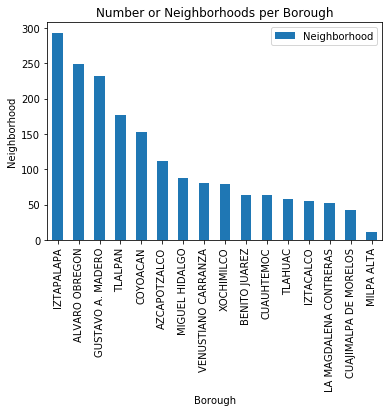

In [60]:
df_alcaldias.plot.bar(x='Borough', y='Neighborhood')
plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Neighborhood') # add y-label to the plot
plt.title('Number or Neighborhoods per Borough') # add title to the plot

In [71]:
# Select the Borough based on HDI
# Read CVS
df_hdi = pd.read_csv("3_hdi.csv", header=0)
df_hdi.head()

,Puesto,Delegación,IDH,País comparable
0,1,Benito Juárez,0.917,Alemania
1,2,Miguel Hidalgo,0.880,Eslovenia
2,3,Coyoacán,0.867,Grecia
3,4,Cuauhtémoc,0.848,Catar
4,5,Azcapotzalco,0.832,Chile


Text(0.5, 1.0, 'HDI per Borough')

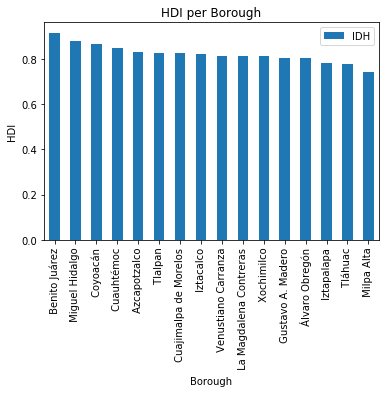

In [73]:
df_hdi.plot.bar(x='Delegación', y='IDH')
plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('HDI') # add y-label to the plot
plt.title('HDI per Borough') # add title to the plot

In [74]:
# Get the map of Neighborhoods in Benito Juarez
bj_data = df_colonias[df_colonias['ALCALDIA'] == 'BENITO JUAREZ'].reset_index(drop=True)
bj_data.head()

,COLONIA,ALCALDIA,Latitude,Longitude
0,NARVARTE V,BENITO JUAREZ,19.386051,-99.157160
1,PORTALES III,BENITO JUAREZ,19.363211,-99.148887
2,DEL VALLE VII,BENITO JUAREZ,19.368136,-99.171326
3,NAPOLES (AMPL),BENITO JUAREZ,19.387303,-99.177728
4,LETRAN VALLE,BENITO JUAREZ,19.376132,-99.155067


In [75]:
bj_data.shape

(64, 4)

In [121]:
test = bj_data.groupby(['COLONIA'])
print(test)

In [79]:
address = 'Benito Juarez, Mexico City'

geolocator = Nominatim(user_agent="bj_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Benito Juarez are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Benito Juarez are 19.3804695, -99.1632429340113.


In [80]:
map_bj = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(bj_data['Latitude'], bj_data['Longitude'], bj_data['COLONIA']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#fff',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bj)  
    
map_bj

In [122]:
# Foursquare data
CLIENT_ID = 'KXTFRJ42N1AM00ZP22TQWVRXN3K3XO4ZG40GGQ12WVBAXNL4' # your Foursquare ID
CLIENT_SECRET = 'SSZ0AB1EXBG3VWLMTDY4GSMLICVQU21N0TBOC2W4HK1M2G4A' # your Foursquare Secret
VERSION = '20190120' # Foursquare API version
LIMIT = 100

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KXTFRJ42N1AM00ZP22TQWVRXN3K3XO4ZG40GGQ12WVBAXNL4
CLIENT_SECRET:SSZ0AB1EXBG3VWLMTDY4GSMLICVQU21N0TBOC2W4HK1M2G4A


In [125]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    search_query = "Comida"
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [126]:
bj_venues = getNearbyVenues(names=bj_data['COLONIA'],
                                   latitudes=bj_data['Latitude'],
                                   longitudes=bj_data['Longitude']
                                  )

NARVARTE V
PORTALES III
DEL VALLE VII
NAPOLES (AMPL)
LETRAN VALLE
NIOS HEROES DE CHAPULTEPEC
ZACAHUITZCO
NARVARTE III
MIRAVALLE
JOSEFA ORTIZ DE DOMINGUEZ
INDEPENDENCIA
INSURGENTES MIXCOAC
NAPOLES
NARVARTE I
PORTALES IV
TLACOQUEMECATL DEL VALLE
ACACIAS
IZTACCIHUATL
CREDITO CONSTRUCTOR
CIUDAD DE LOS DEPORTES
MIGUEL ALEMAN
CENTRO URBANO PRESIDENTE ALEMAN (U HAB)
GENERAL PEDRO MARIA ANAYA
SAN JOSE INSURGENTES
DEL VALLE IV
PORTALES I
NARVARTE VI
NONOALCO
MERCED GOMEZ
INSURGENTES SAN BORJA
ATENOR SALAS
DEL VALLE V
SAN PEDRO DE LOS  PINOS
NOCHE BUENA
DEL VALLE II
ALAMOS II
ACTIPAN
VILLA DE CORTES
ERMITA
MARIA DEL CARMEN
RESIDENCIAL EMPERADORES
PERIODISTA FRANCISCO ZARCO
MIXCOAC
SAN JUAN
STA CRUZ ATOYAC
DEL VALLE III
DEL VALLE VI
PORTALES II
NARVARTE II
POSTAL
OCHO DE AGOSTO
AMERICAS UNIDAS-DEL LAGO
EXTREMADURA INSURGENTES
ALBERT
MODERNA
NATIVITAS
SAN SIMON TICUMAC
DEL VALLE I
VERTIZ NARVARTE
XOCO
ALAMOS I
NARVARTE IV
PIEDAD NARVARTE
PORTALES ORIENTE


In [128]:
bj_venues.shape

(1920, 7)

In [130]:
bj_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,NARVARTE V,19.386051,-99.15716,La Esperanza,19.385898,-99.157321,Bakery
1,NARVARTE V,19.386051,-99.15716,Almanegra Café,19.385326,-99.155343,Coffee Shop
2,NARVARTE V,19.386051,-99.15716,CADE Centro de Artes Decorativas,19.384619,-99.156920,Flower Shop
3,NARVARTE V,19.386051,-99.15716,Costra,19.386832,-99.154611,Bakery
4,NARVARTE V,19.386051,-99.15716,Pimienta Gorda,19.388296,-99.156791,Vegetarian / Vegan Restaurant


In [132]:
bj_venues.tail()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1915,PORTALES ORIENTE,19.365916,-99.140209,Mauna Café,19.364832,-99.146622,Coffee Shop
1916,PORTALES ORIENTE,19.365916,-99.140209,Liga Tranviarios,19.366484,-99.135398,Baseball Stadium
1917,PORTALES ORIENTE,19.365916,-99.140209,"El charro, barbacoa",19.369990,-99.142547,Taco Place
1918,PORTALES ORIENTE,19.365916,-99.140209,La Tixeria,19.369696,-99.144045,Mexican Restaurant
1919,PORTALES ORIENTE,19.365916,-99.140209,"Barbacoa ""Las Comadres""",19.361412,-99.138998,Taco Place


In [133]:
print('There are {} uniques categories.'.format(len(bj_venues['Venue Category'].unique())))

There are 193 uniques categories.


In [236]:
most_common = bj_venues['Venue Category'].value_counts().to_frame()

In [237]:
most_common.head()

,Venue Category
Mexican Restaurant,216
Taco Place,152
Coffee Shop,117
Ice Cream Shop,89
Bakery,84


In [142]:
# One hot Encoding
bj_onehot = pd.get_dummies(bj_venues[['Venue Category']], prefix="", prefix_sep="")

In [143]:
bj_onehot.head()

,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Warehouse Store,Water Park,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [144]:
bj_onehot['Neighborhood'] = bj_venues['Neighborhood']
bj_onehot.head()

,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,...,Venezuelan Restaurant,Veterinarian,Warehouse Store,Water Park,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio,Neighborhood
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NARVARTE V
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NARVARTE V
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NARVARTE V
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NARVARTE V
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NARVARTE V


In [145]:
# Move Neighborhood to the first column
fixed_columns = [bj_onehot.columns[-1]] + list(bj_onehot.columns[:-1])
bj_onehot = bj_onehot[fixed_columns]

bj_onehot.head()

,Neighborhood,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Warehouse Store,Water Park,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio
0,NARVARTE V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NARVARTE V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NARVARTE V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NARVARTE V,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NARVARTE V,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [146]:
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
bj_grouped = bj_onehot.groupby('Neighborhood').mean().reset_index()
bj_grouped

,Neighborhood,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Warehouse Store,Water Park,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio
0,ACACIAS,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACTIPAN,0.0,0.0,0.033333,0.000000,0.0,0.0,0.000000,0.033333,0.0,...,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ALAMOS I,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ALAMOS II,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.033333,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALBERT,0.0,0.0,0.000000,0.000000,0.0,0.0,0.033333,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,TLACOQUEMECATL DEL VALLE,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,VERTIZ NARVARTE,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61,VILLA DE CORTES,0.0,0.0,0.033333,0.033333,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62,XOCO,0.0,0.0,0.000000,0.033333,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
bj_grouped.shape

(64, 194)

In [148]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 10

for hood in bj_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bj_grouped[bj_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ACACIAS----
                  venue  freq
0        Cosmetics Shop  0.10
1                   Gym  0.07
2    Mexican Restaurant  0.07
3                 Motel  0.03
4                Garden  0.03
5                  Park  0.03
6                  Café  0.03
7    Seafood Restaurant  0.03
8            Steakhouse  0.03
9  Gym / Fitness Center  0.03


----ACTIPAN----
                  venue  freq
0        Cosmetics Shop  0.10
1          Burger Joint  0.07
2          Dance Studio  0.07
3           Coffee Shop  0.07
4          Dessert Shop  0.07
5            Hobby Shop  0.03
6  Other Great Outdoors  0.03
7          Optical Shop  0.03
8                  Café  0.03
9         Shopping Mall  0.03


----ALAMOS I----
                  venue  freq
0    Mexican Restaurant  0.13
1                Bakery  0.10
2           Coffee Shop  0.10
3            Taco Place  0.10
4  Gym / Fitness Center  0.07
5             Pet Store  0.03
6                  Park  0.03
7            Steakhouse  0.03
8            Food

                  venue  freq
0    Mexican Restaurant  0.30
1           Coffee Shop  0.10
2          Burger Joint  0.07
3  Gym / Fitness Center  0.07
4        Ice Cream Shop  0.07
5            Restaurant  0.03
6          Dance Studio  0.03
7            Taco Place  0.03
8    Seafood Restaurant  0.03
9        Breakfast Spot  0.03


----NOCHE BUENA----
                   venue  freq
0             Taco Place  0.20
1     Mexican Restaurant  0.10
2     Seafood Restaurant  0.07
3                 Bakery  0.07
4                  Trail  0.03
5              Nightclub  0.03
6                   Café  0.03
7  General Entertainment  0.03
8                   Park  0.03
9                Stadium  0.03


----NONOALCO----
                venue  freq
0          Taco Place  0.13
1         Coffee Shop  0.10
2  Mexican Restaurant  0.07
3        Dance Studio  0.07
4           Pet Store  0.07
5          Restaurant  0.03
6  Rock Climbing Spot  0.03
7            Pharmacy  0.03
8          Food Court  0.03
9       

In [149]:
# Function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [222]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bj_grouped['Neighborhood']

for ind in np.arange(bj_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bj_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ACACIAS,Cosmetics Shop,Mexican Restaurant,Gym,Health Food Store,Sushi Restaurant,Steakhouse,Boutique,Bowling Alley,Food Truck,Men's Store
1,ACTIPAN,Cosmetics Shop,Burger Joint,Dessert Shop,Coffee Shop,Dance Studio,Hobby Shop,Bakery,Seafood Restaurant,Café,Mexican Restaurant
2,ALAMOS I,Mexican Restaurant,Bakery,Coffee Shop,Taco Place,Gym / Fitness Center,Pie Shop,Market,Steakhouse,Martial Arts Dojo,Food Truck
3,ALAMOS II,Taco Place,Mexican Restaurant,Dance Studio,Park,Restaurant,Coffee Shop,Fast Food Restaurant,Café,Snack Place,Soccer Field
4,ALBERT,Mexican Restaurant,Dessert Shop,Taco Place,Pizza Place,Breakfast Spot,Farmers Market,Flea Market,Sandwich Place,Seafood Restaurant,Food Stand


In [223]:
# Find the best K
distortions = []
K = range(1,15)
bj_grouped_clustering = bj_grouped.drop('Neighborhood', 1)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(bj_grouped_clustering)
    distortions.append(kmeanModel.inertia_)

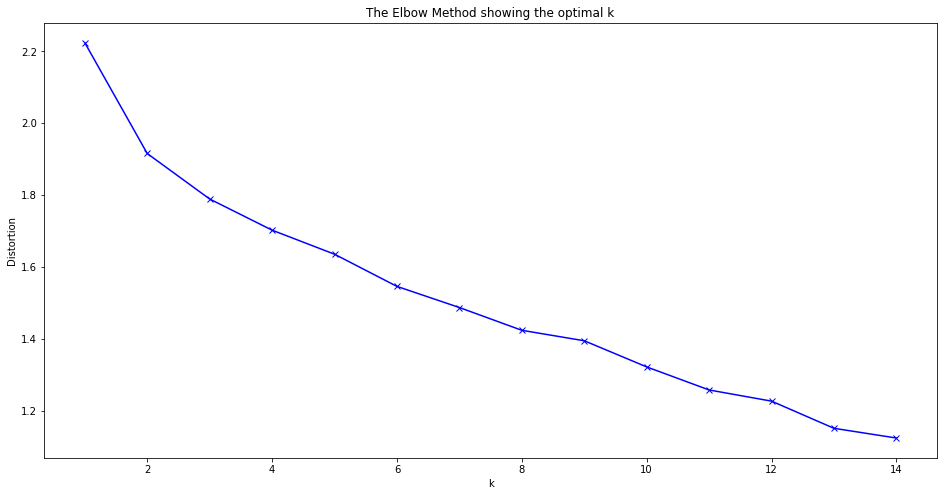

In [224]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [225]:
kclusters = 10

bj_grouped_clustering = bj_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bj_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 3, 6, 9, 0, 5, 8, 8, 9, 8], dtype=int32)

In [226]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bj_merged = bj_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bj_merged = bj_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='COLONIA')

bj_merged.head() # check the last columns!

,COLONIA,ALCALDIA,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,NARVARTE V,BENITO JUAREZ,19.386051,-99.157160,8,Coffee Shop,Spa,Seafood Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Taco Place,Bakery,Lebanese Restaurant,Performing Arts Venue,Health Food Store
1,PORTALES III,BENITO JUAREZ,19.363211,-99.148887,8,Coffee Shop,Bakery,Spa,Restaurant,Burger Joint,Mexican Restaurant,Bar,Dance Studio,Food Court,Seafood Restaurant
2,DEL VALLE VII,BENITO JUAREZ,19.368136,-99.171326,8,Coffee Shop,Mexican Restaurant,Garden,Health Food Store,Seafood Restaurant,Flea Market,Motel,Food & Drink Shop,Soccer Stadium,Pet Store
3,NAPOLES (AMPL),BENITO JUAREZ,19.387303,-99.177728,2,Bakery,Ice Cream Shop,Pizza Place,Middle Eastern Restaurant,Taco Place,French Restaurant,Pet Store,Food Truck,Mexican Restaurant,Health & Beauty Service
4,LETRAN VALLE,BENITO JUAREZ,19.376132,-99.155067,6,Taco Place,Bakery,Mexican Restaurant,Ice Cream Shop,Pizza Place,Pet Store,IT Services,Liquor Store,Dessert Shop,Park


In [227]:
bj_merged.isnull().values.any()

False

In [228]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bj_merged['Latitude'], bj_merged['Longitude'], bj_merged['COLONIA'], bj_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [221]:
bj_merged.to_csv('resultado.csv')

In [208]:
bj_merged.loc[bj_merged['Cluster Labels'] == 0, bj_merged.columns[[0] + list(range(5, bj_merged.shape[1]))]]

,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,ZACAHUITZCO,Mexican Restaurant,Taco Place,Dessert Shop,Breakfast Spot,Bakery,Pizza Place,English Restaurant,Farmers Market,Sandwich Place,Seafood Restaurant
20,MIGUEL ALEMAN,Mexican Restaurant,Burger Joint,Taco Place,Brewery,Park,Food Stand,Music Venue,Breakfast Spot,Fried Chicken Joint,Coffee Shop
39,MARIA DEL CARMEN,Mexican Restaurant,Taco Place,Breakfast Spot,Sporting Goods Shop,English Restaurant,Coffee Shop,Sandwich Place,Food,Burger Joint,Food Stand
53,ALBERT,Mexican Restaurant,Dessert Shop,Taco Place,Pizza Place,Breakfast Spot,Farmers Market,Flea Market,Sandwich Place,Seafood Restaurant,Food Stand
56,SAN SIMON TICUMAC,Mexican Restaurant,Food Truck,Pool,Coffee Shop,Breakfast Spot,Dessert Shop,Argentinian Restaurant,Burger Joint,Farmers Market,Motel


In [209]:
bj_merged.loc[bj_merged['Cluster Labels'] == 1, bj_merged.columns[[0] + list(range(5, bj_merged.shape[1]))]]

,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,NARVARTE III,Coffee Shop,Taco Place,Bakery,Mexican Restaurant,Gym / Fitness Center,American Restaurant,Café,Salad Place,Restaurant,Steakhouse
27,NONOALCO,Taco Place,Coffee Shop,Pet Store,Mexican Restaurant,Dance Studio,Electronics Store,Food Court,Spa,Pharmacy,Food Truck
40,RESIDENCIAL EMPERADORES,Mexican Restaurant,Taco Place,Bakery,Coffee Shop,Pet Café,Sandwich Place,Candy Store,Brewery,Spa,Restaurant
43,SAN JUAN,Taco Place,Coffee Shop,Mexican Restaurant,Health & Beauty Service,Japanese Restaurant,Performing Arts Venue,Pharmacy,Deli / Bodega,Pizza Place,Health Food Store
44,STA CRUZ ATOYAC,Taco Place,Gym / Fitness Center,Mexican Restaurant,Basketball Court,Chocolate Shop,Residential Building (Apartment / Condo),Coffee Shop,Lingerie Store,Multiplex,Sushi Restaurant
46,DEL VALLE VI,Taco Place,Coffee Shop,Sushi Restaurant,Yoga Studio,Gym / Fitness Center,Pharmacy,Pet Store,Park,Mexican Restaurant,Italian Restaurant


In [210]:
bj_merged.loc[bj_merged['Cluster Labels'] == 2, bj_merged.columns[[0] + list(range(5, bj_merged.shape[1]))]]

,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,NAPOLES (AMPL),Bakery,Ice Cream Shop,Pizza Place,Middle Eastern Restaurant,Taco Place,French Restaurant,Pet Store,Food Truck,Mexican Restaurant,Health & Beauty Service
22,GENERAL PEDRO MARIA ANAYA,Pool,Bakery,Ice Cream Shop,Theater,Candy Store,Exhibit,Bike Rental / Bike Share,Sports Club,Restaurant,Concert Hall
24,DEL VALLE IV,Mexican Restaurant,Ice Cream Shop,Italian Restaurant,Spa,Restaurant,Yoga Studio,Performing Arts Venue,Coffee Shop,Dessert Shop,Pizza Place
29,INSURGENTES SAN BORJA,Taco Place,Pizza Place,Restaurant,Ice Cream Shop,Café,Bakery,Yoga Studio,Dance Studio,Nightclub,Seafood Restaurant


In [211]:
bj_merged.loc[bj_merged['Cluster Labels'] == 3, bj_merged.columns[[0] + list(range(5, bj_merged.shape[1]))]]

,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,NARVARTE I,Ice Cream Shop,Sporting Goods Shop,Clothing Store,Seafood Restaurant,American Restaurant,Beer Bar,Boxing Gym,Men's Store,Mexican Restaurant,Burger Joint
16,ACACIAS,Cosmetics Shop,Mexican Restaurant,Gym,Health Food Store,Sushi Restaurant,Steakhouse,Boutique,Bowling Alley,Food Truck,Men's Store
36,ACTIPAN,Cosmetics Shop,Burger Joint,Dessert Shop,Coffee Shop,Dance Studio,Hobby Shop,Bakery,Seafood Restaurant,Café,Mexican Restaurant
52,EXTREMADURA INSURGENTES,Park,Coffee Shop,Café,Ice Cream Shop,Taco Place,Mexican Restaurant,Dog Run,Bakery,Steakhouse,Sushi Restaurant
59,XOCO,Ice Cream Shop,Garden,Cosmetics Shop,Pool,Concert Hall,Residential Building (Apartment / Condo),Candy Store,Music Venue,Men's Store,Sports Club
62,PIEDAD NARVARTE,Sporting Goods Shop,Donut Shop,Ice Cream Shop,Clothing Store,Cosmetics Shop,Mexican Restaurant,American Restaurant,Chinese Restaurant,Salsa Club,Coffee Shop


In [212]:
bj_merged.loc[bj_merged['Cluster Labels'] == 4, bj_merged.columns[[0] + list(range(5, bj_merged.shape[1]))]]

,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,JOSEFA ORTIZ DE DOMINGUEZ,Ice Cream Shop,Mexican Restaurant,Taco Place,Coffee Shop,Burger Joint,Park,Shipping Store,Food Stand,Seafood Restaurant,Miscellaneous Shop
15,TLACOQUEMECATL DEL VALLE,Park,Ice Cream Shop,Mexican Restaurant,Gym / Fitness Center,Floating Market,Sushi Restaurant,Steakhouse,Multiplex,Butcher,Café
17,IZTACCIHUATL,Mexican Restaurant,Ice Cream Shop,Taco Place,Dessert Shop,Burger Joint,Park,Miscellaneous Shop,Breakfast Spot,Café,Shipping Store
31,DEL VALLE V,Mexican Restaurant,Coffee Shop,Park,Ice Cream Shop,Taco Place,Gourmet Shop,Pool,Recreation Center,Sandwich Place,Camera Store
37,VILLA DE CORTES,Mexican Restaurant,Ice Cream Shop,Taco Place,Park,Coffee Shop,Breakfast Spot,Tea Room,Dessert Shop,Pizza Place,Music Venue
49,POSTAL,Mexican Restaurant,Taco Place,Coffee Shop,Burger Joint,Tea Room,Pizza Place,Park,Fast Food Restaurant,Shipping Store,Café


In [213]:
bj_merged.loc[bj_merged['Cluster Labels'] == 5, bj_merged.columns[[0] + list(range(5, bj_merged.shape[1]))]]

,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,NIOS HEROES DE CHAPULTEPEC,Mexican Restaurant,Coffee Shop,Ice Cream Shop,Burger Joint,Gym / Fitness Center,Dance Studio,Market,Park,Restaurant,Seafood Restaurant
8,MIRAVALLE,Mexican Restaurant,Coffee Shop,Theater,Performing Arts Venue,Taco Place,Dance Studio,Restaurant,College Arts Building,Liquor Store,Bookstore
41,PERIODISTA FRANCISCO ZARCO,Mexican Restaurant,Food Truck,Gym / Fitness Center,Coffee Shop,Steakhouse,Taco Place,Dance Studio,Spa,Gymnastics Gym,Candy Store
51,AMERICAS UNIDAS-DEL LAGO,Mexican Restaurant,Taco Place,Coffee Shop,Gym / Fitness Center,Ice Cream Shop,Restaurant,Hotel,Pizza Place,Burger Joint,Food Truck
55,NATIVITAS,Mexican Restaurant,Taco Place,Ice Cream Shop,Dessert Shop,Coffee Shop,Pizza Place,Hotel,Bakery,Restaurant,Convenience Store
63,PORTALES ORIENTE,Mexican Restaurant,Taco Place,Coffee Shop,Breakfast Spot,Baseball Stadium,Pizza Place,Dance Studio,Flea Market,Seafood Restaurant,Southern / Soul Food Restaurant


In [229]:
bj_merged.loc[bj_merged['Cluster Labels'] == 6, bj_merged.columns[[0] + list(range(5, bj_merged.shape[1]))]]

,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,LETRAN VALLE,Taco Place,Bakery,Mexican Restaurant,Ice Cream Shop,Pizza Place,Pet Store,IT Services,Liquor Store,Dessert Shop,Park
10,INDEPENDENCIA,Mexican Restaurant,Coffee Shop,Food Truck,Bakery,Steakhouse,Taco Place,Dessert Shop,Dance Studio,Pool,Farmers Market
32,SAN PEDRO DE LOS PINOS,Mexican Restaurant,Bakery,Ice Cream Shop,Park,Food Truck,Yoga Studio,Café,Bistro,Pharmacy,Burger Joint
34,DEL VALLE II,Mexican Restaurant,Health & Beauty Service,Bakery,Pet Store,Ice Cream Shop,Deli / Bodega,Park,Sushi Restaurant,Taco Place,Tapas Restaurant
45,DEL VALLE III,Mexican Restaurant,Dance Studio,Coffee Shop,Spa,Taco Place,Bakery,Liquor Store,Drugstore,Park,Camera Store
50,OCHO DE AGOSTO,Mexican Restaurant,Bakery,Taco Place,Food Truck,Performing Arts Venue,Hotel,Burger Joint,Motorcycle Shop,Seafood Restaurant,Bistro
58,VERTIZ NARVARTE,Mexican Restaurant,Bakery,Taco Place,Flower Shop,Steakhouse,Russian Restaurant,Coffee Shop,Spa,Southern / Soul Food Restaurant,German Restaurant
60,ALAMOS I,Mexican Restaurant,Bakery,Coffee Shop,Taco Place,Gym / Fitness Center,Pie Shop,Market,Steakhouse,Martial Arts Dojo,Food Truck


In [230]:
bj_merged.loc[bj_merged['Cluster Labels'] == 7, bj_merged.columns[[0] + list(range(5, bj_merged.shape[1]))]]

,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,SAN JOSE INSURGENTES,Coffee Shop,Ice Cream Shop,Mexican Restaurant,Italian Restaurant,Tapas Restaurant,Fountain,Bakery,Buffet,Seafood Restaurant,Café
28,MERCED GOMEZ,Ice Cream Shop,Bakery,Coffee Shop,Taco Place,Dessert Shop,Furniture / Home Store,Chocolate Shop,Tapas Restaurant,Farmers Market,Tea Room


In [231]:
bj_merged.loc[bj_merged['Cluster Labels'] == 8, bj_merged.columns[[0] + list(range(5, bj_merged.shape[1]))]]

,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,NARVARTE V,Coffee Shop,Spa,Seafood Restaurant,Mexican Restaurant,Vegetarian / Vegan Restaurant,Taco Place,Bakery,Lebanese Restaurant,Performing Arts Venue,Health Food Store
1,PORTALES III,Coffee Shop,Bakery,Spa,Restaurant,Burger Joint,Mexican Restaurant,Bar,Dance Studio,Food Court,Seafood Restaurant
2,DEL VALLE VII,Coffee Shop,Mexican Restaurant,Garden,Health Food Store,Seafood Restaurant,Flea Market,Motel,Food & Drink Shop,Soccer Stadium,Pet Store
11,INSURGENTES MIXCOAC,Coffee Shop,Mexican Restaurant,Cosmetics Shop,Diner,Bakery,Optical Shop,Food Truck,Taco Place,Seafood Restaurant,Salon / Barbershop
12,NAPOLES,Japanese Restaurant,Coffee Shop,Spa,Mexican Restaurant,Sandwich Place,Martial Arts Dojo,Spanish Restaurant,Bridal Shop,Café,Music Store
14,PORTALES IV,Bakery,Spa,Mexican Restaurant,Coffee Shop,Restaurant,Burger Joint,History Museum,Park,Café,Food Court
18,CREDITO CONSTRUCTOR,Mexican Restaurant,Sandwich Place,Argentinian Restaurant,Coffee Shop,Café,Movie Theater,Sports Club,Fountain,Steakhouse,French Restaurant
21,CENTRO URBANO PRESIDENTE ALEMAN (U HAB),Ice Cream Shop,Supermarket,Gym / Fitness Center,Coffee Shop,Seafood Restaurant,Mexican Restaurant,Food Truck,Burger Joint,Soccer Field,Butcher
26,NARVARTE VI,Coffee Shop,Mexican Restaurant,Music Venue,Breakfast Spot,Southern / Soul Food Restaurant,Brewery,Burger Joint,Café,Seafood Restaurant,Health & Beauty Service
30,ATENOR SALAS,Seafood Restaurant,Burger Joint,Taco Place,Mexican Restaurant,Breakfast Spot,Bar,Food Truck,South American Restaurant,Boxing Gym,Coffee Shop


In [232]:
bj_merged.loc[bj_merged['Cluster Labels'] == 9, bj_merged.columns[[0] + list(range(5, bj_merged.shape[1]))]]

,COLONIA,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,CIUDAD DE LOS DEPORTES,Taco Place,Mexican Restaurant,Bakery,Ice Cream Shop,Seafood Restaurant,Kebab Restaurant,Playground,Dance Studio,Peruvian Restaurant,Restaurant
25,PORTALES I,Taco Place,Mexican Restaurant,Flea Market,Burger Joint,Seafood Restaurant,Food Truck,Southern / Soul Food Restaurant,Motel,Café,Pool
33,NOCHE BUENA,Taco Place,Mexican Restaurant,Seafood Restaurant,Bakery,American Restaurant,Peruvian Restaurant,Sushi Restaurant,General Entertainment,Dessert Shop,Park
35,ALAMOS II,Taco Place,Mexican Restaurant,Dance Studio,Park,Restaurant,Coffee Shop,Fast Food Restaurant,Café,Snack Place,Soccer Field
47,PORTALES II,Taco Place,Mexican Restaurant,Seafood Restaurant,Restaurant,Spa,Café,Bakery,Coffee Shop,Gastropub,Flea Market
54,MODERNA,Taco Place,Mexican Restaurant,Ice Cream Shop,Hobby Shop,Lounge,Pet Store,Park,Farmers Market,Rest Area,Restaurant
61,NARVARTE IV,Taco Place,Coffee Shop,Café,Burger Joint,Mexican Restaurant,Breakfast Spot,Pharmacy,Pizza Place,Dance Studio,Restaurant
